In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Datamining_project"

/content/drive/MyDrive/Datamining_project


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/Datamining_project/merged_output.csv')

In [5]:
dataset.shape

(11115, 10)

**Checking range of values for each features**

In [6]:
dataset['ph'].unique()

array([7.0807945 , 6.78388847, 6.01061758, ..., 8.37291028, 9.41951032,
       5.12676292])

In [7]:
dataset['Hardness'].unique()


array([219.67426193, 193.6535806 , 184.55858174, ..., 260.59315435,
       169.08705216, 230.60375751])

In [8]:
dataset['Chloramines'].unique()

array([5.87504109, 5.17145357, 8.16522204, ..., 7.54798402, 6.29731153,
       6.30335653])

In [9]:
dataset['Organic_carbon'].unique()

array([11.50231563, 15.05606409, 20.31461674, ...,  8.66867218,
       11.08302657, 11.16894622])

In [10]:
dataset['Trihalomethanes'].unique()

array([112.41221043,  66.39629295,  83.70793779, ...,  74.77339241,
        38.43515078,  77.4882131 ])

In [11]:
dataset['Turbidity'].unique()

array([2.99425921, 3.25002223, 4.8672874 , ..., 4.90635824, 4.43582091,
       4.70865847])

In [12]:
dataset['Potability'].unique()

array([0, 1])

**Describing data**

In [13]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,10624.000000,11115.000000,11115.000000,11115.000000,10334.000000,11115.000000,11115.000000,10953.000000,11115.000000,11115.000000
mean,7.080285,196.462592,22021.089569,7.125311,333.905433,426.408250,14.257056,66.374767,3.967343,0.389294
std,1.518263,32.626769,8695.997976,1.579552,38.111904,80.559336,3.336236,15.902561,0.778751,0.487612
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.195087,176.866483,15765.786718,6.132339,313.877400,365.491679,12.033693,56.347689,3.439623,0.000000
50%,7.080795,197.222066,21021.418259,7.129520,333.775777,422.039495,14.184036,66.396293,3.958609,0.000000
75%,7.937392,216.551887,27331.361962,8.109346,354.250252,482.294404,16.541900,77.079780,4.502138,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030643,753.342620,28.300000,124.000000,6.739000,1.000000


****

**Check distribution of each feature with Hist Plot**

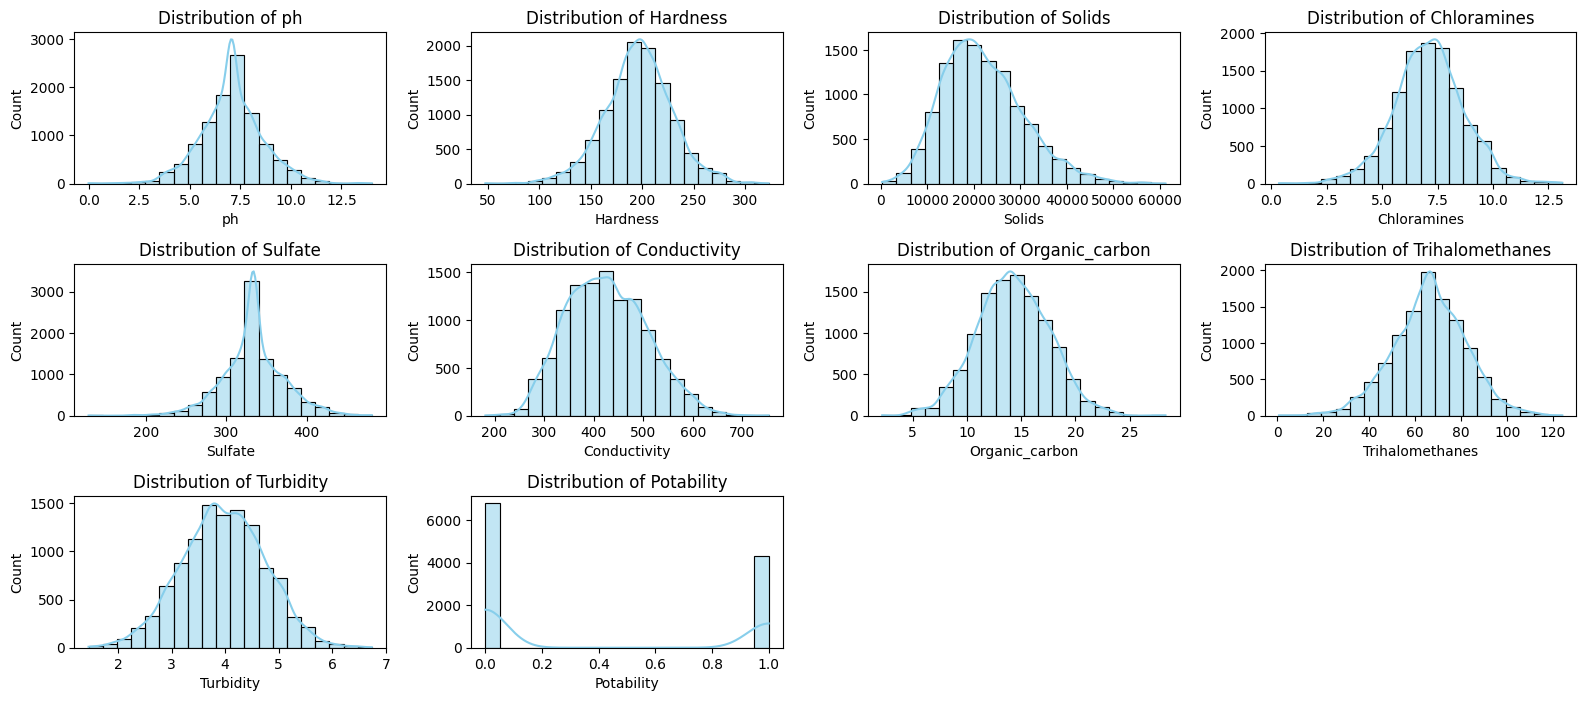

In [14]:

import seaborn as sns
plt.figure(figsize=(16, 9))
plt.subplots_adjust(wspace=0.3, hspace=0.4)


# Loop through each column in the dataset
o = 1
for i, col in enumerate(dataset.columns):
    plt.subplot(4, 4, o)
    sns.histplot(data=dataset, x=col, kde=True, color='skyblue', edgecolor='black', bins=20)
    plt.title(f'Distribution of {col}')
    o += 1

# Display the plots
plt.tight_layout()
plt.show()

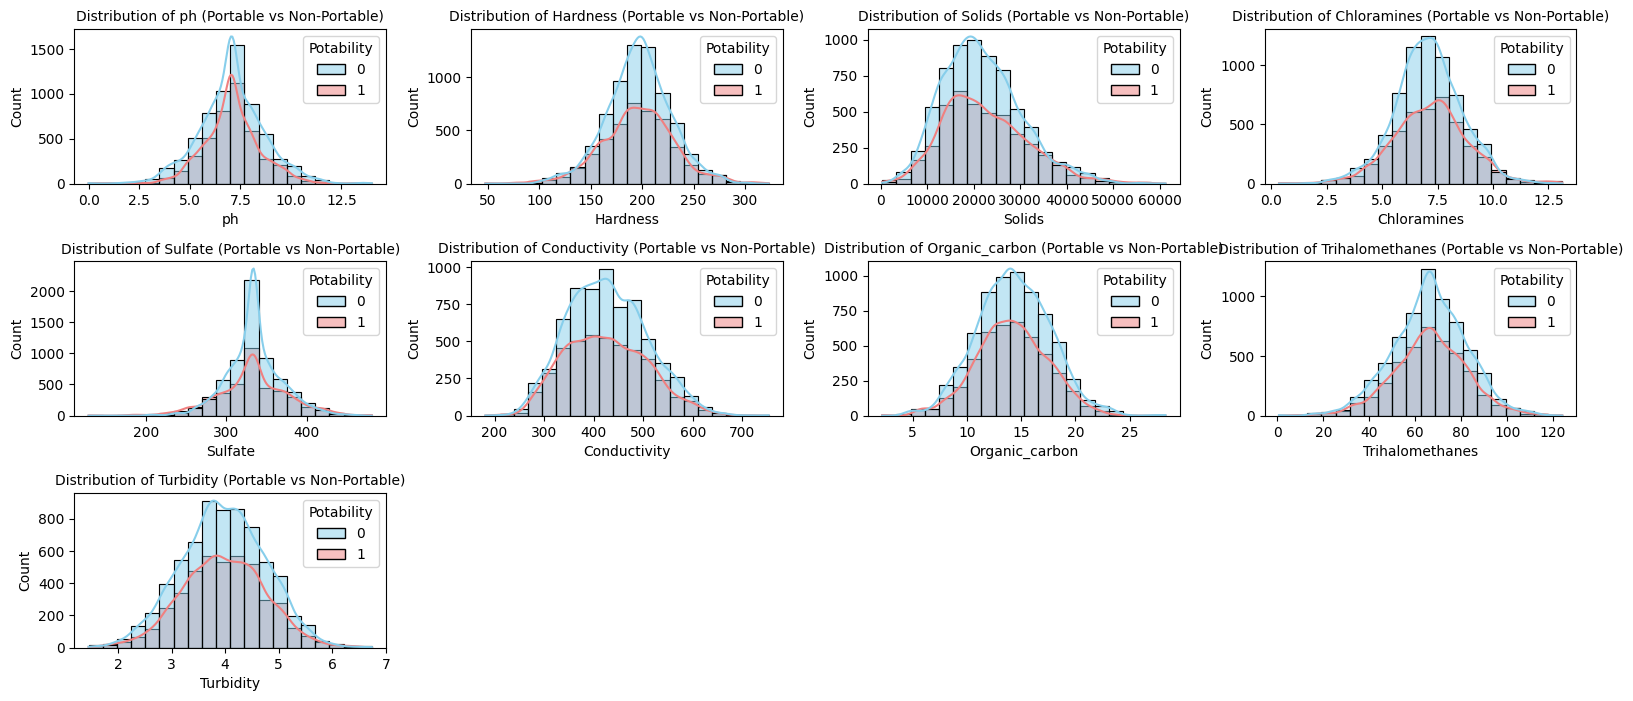

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 9))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Loop through each column in the dataset (excluding 'Potability' if it doesn't make sense to histogram itself)
o = 1
for i, col in enumerate(dataset.columns):
    if col != 'Potability':  # Avoid plotting the 'Potability' column itself
        plt.subplot(4, 4, o)
        sns.histplot(
            data=dataset,
            x=col,
            hue='Potability',  # Use 'Potability' to distinguish between portable and non-portable
            kde=True,
            edgecolor='black',
            bins=20,
            palette=['skyblue', 'lightcoral']
        )
        plt.title(f'Distribution of {col} (Portable vs Non-Portable)', fontsize=10)
        o += 1

# Adjust layout and display
plt.tight_layout()
plt.show()


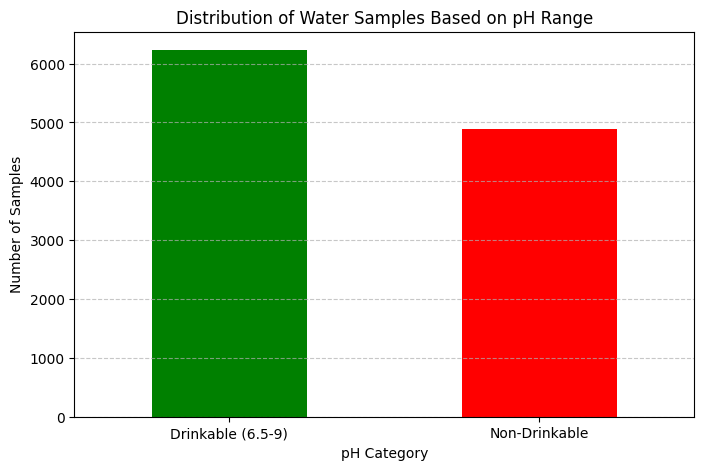

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Filter the dataset for drinkable pH range
dataset['pH_Category'] = dataset['ph'].apply(lambda x: 'Drinkable (6.5-9)' if 6.5 <= x <= 9 else 'Non-Drinkable')

# Count the occurrences of each category
ph_distribution = dataset['pH_Category'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
ph_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Water Samples Based on pH Range')
plt.xlabel('pH Category')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11115 entries, 0 to 11114
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               10624 non-null  float64
 1   Hardness         11115 non-null  float64
 2   Solids           11115 non-null  float64
 3   Chloramines      11115 non-null  float64
 4   Sulfate          10334 non-null  float64
 5   Conductivity     11115 non-null  float64
 6   Organic_carbon   11115 non-null  float64
 7   Trihalomethanes  10953 non-null  float64
 8   Turbidity        11115 non-null  float64
 9   Potability       11115 non-null  int64  
 10  pH_Category      11115 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 955.3+ KB


In [18]:
dataset = dataset.drop(columns=['pH_Category'])

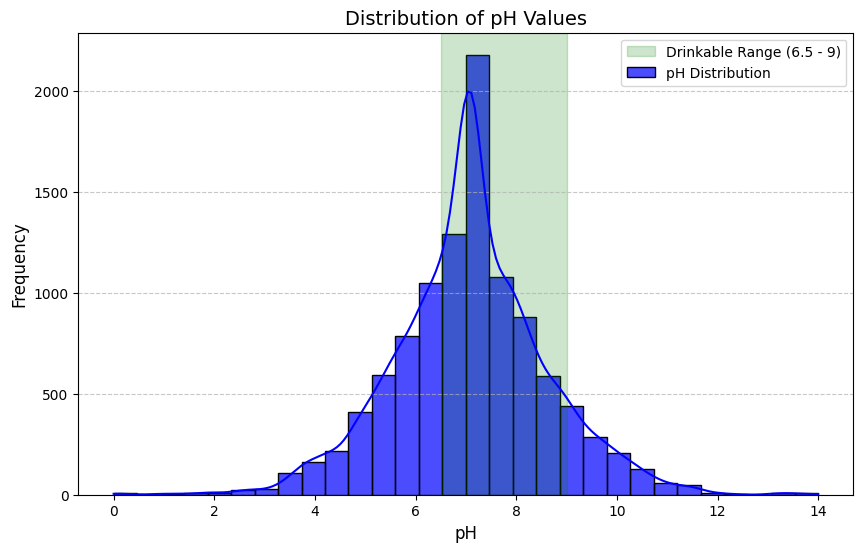

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))

# Plotting the histogram
sns.histplot(data=dataset, x='ph', kde=True, bins=30, color='blue', alpha=0.7, label='pH Distribution')

# Highlighting the drinkable range
plt.axvspan(6.5, 9, color='green', alpha=0.2, label='Drinkable Range (6.5 - 9)')

# Adding labels and title
plt.title('Distribution of pH Values', fontsize=14)
plt.xlabel('pH', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


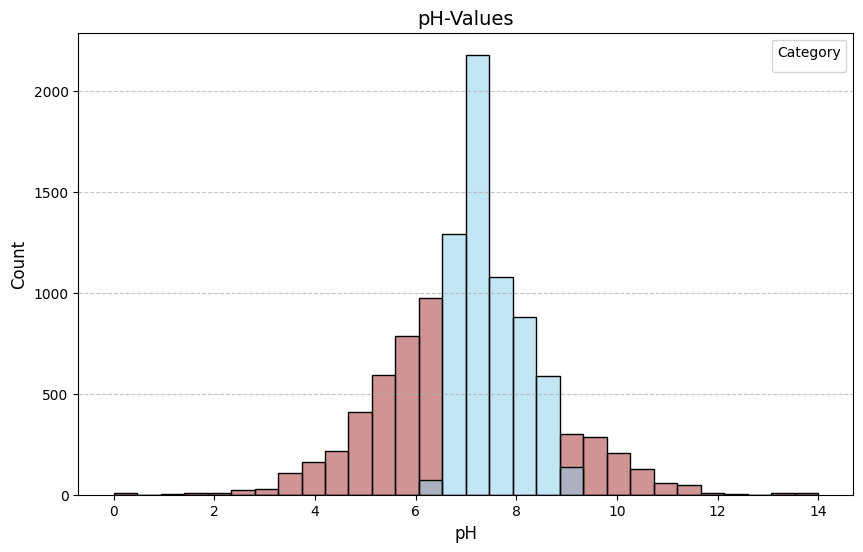

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Define safe and unsafe categories
dataset['pH_Category'] = dataset['ph'].apply(lambda x: 'Safe pH value' if 6.5 <= x <= 9 else 'Unsafe pH value')

# Create the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='ph', hue='pH_Category', kde=False, bins=30, palette={'Safe pH value': 'skyblue', 'Unsafe pH value': 'brown'})

# Add labels and title
plt.title('pH-Values', fontsize=14)
plt.xlabel('pH', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


**Check distribution of each feature with Box Plot**

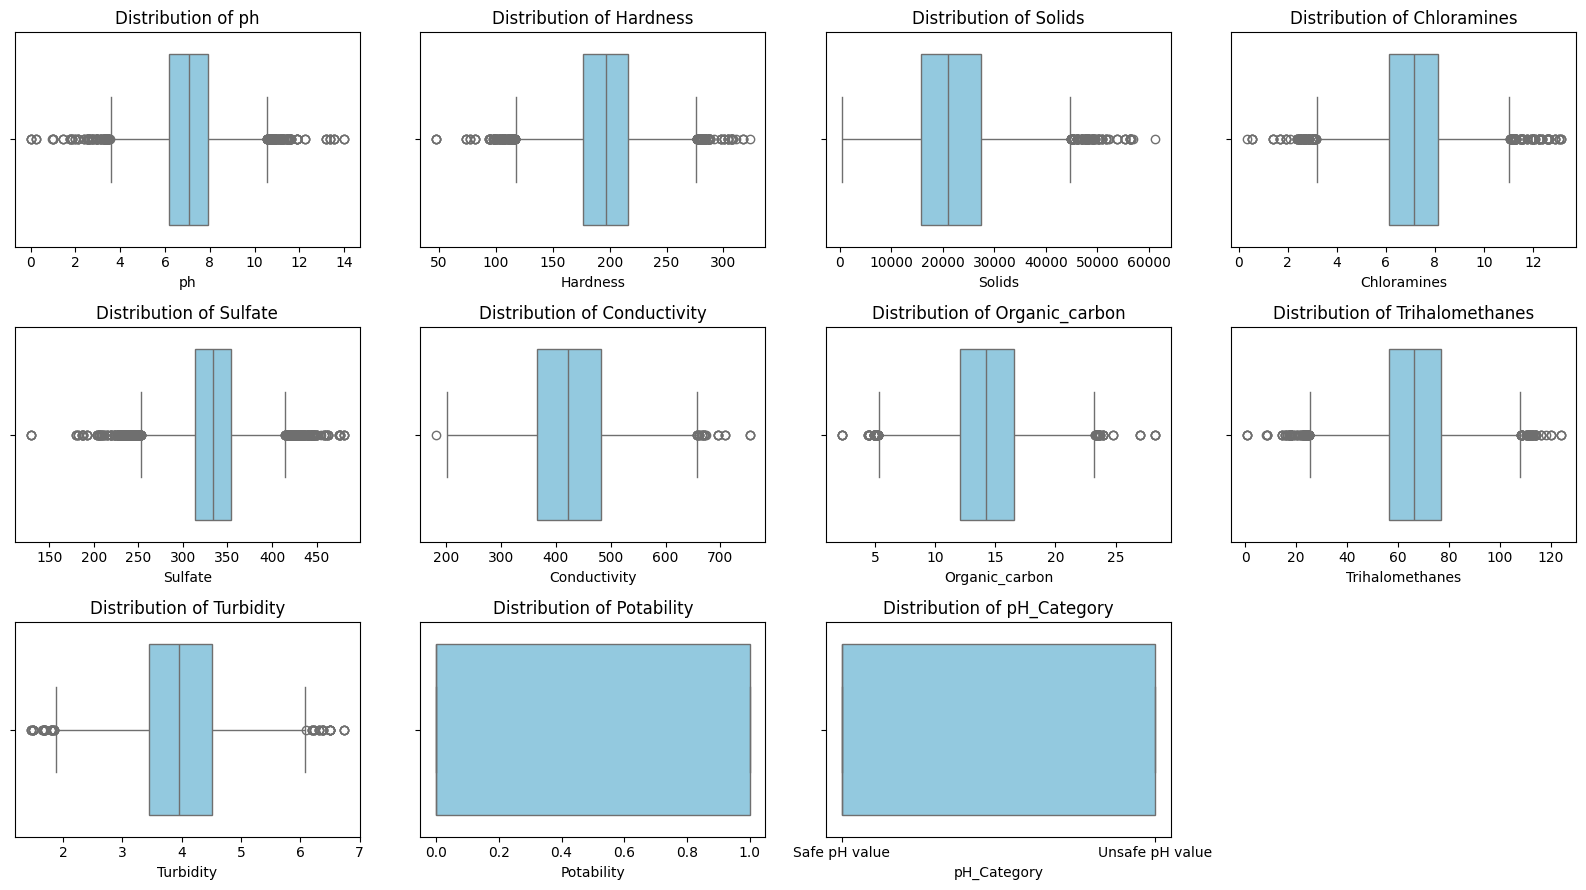

In [21]:
 # Check distribution of each feature with Box Plot

plt.figure(figsize=(16, 9))
plt.subplots_adjust(wspace=0.3, hspace=0.4)


# Loop through each column in the dataset
o = 1
for i, col in enumerate(dataset.columns):
    plt.subplot(3, 4, o)
    sns.boxplot(data=dataset, x=col, color='skyblue')
    plt.title(f'Distribution of {col}')
    o += 1

# Display the plots
plt.tight_layout()
plt.show()

In [22]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Example: Detecting outliers in 'pH' column
outliers = detect_outliers_iqr(dataset, 'Solids')
print(f"Number of outliers in solids: {len(outliers)}")

Number of outliers in solids: 151


**Checking correlation of each features**

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11115 entries, 0 to 11114
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               10624 non-null  float64
 1   Hardness         11115 non-null  float64
 2   Solids           11115 non-null  float64
 3   Chloramines      11115 non-null  float64
 4   Sulfate          10334 non-null  float64
 5   Conductivity     11115 non-null  float64
 6   Organic_carbon   11115 non-null  float64
 7   Trihalomethanes  10953 non-null  float64
 8   Turbidity        11115 non-null  float64
 9   Potability       11115 non-null  int64  
 10  pH_Category      11115 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 955.3+ KB


In [24]:
dataset = dataset.drop(columns=['pH_Category'])

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11115 entries, 0 to 11114
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               10624 non-null  float64
 1   Hardness         11115 non-null  float64
 2   Solids           11115 non-null  float64
 3   Chloramines      11115 non-null  float64
 4   Sulfate          10334 non-null  float64
 5   Conductivity     11115 non-null  float64
 6   Organic_carbon   11115 non-null  float64
 7   Trihalomethanes  10953 non-null  float64
 8   Turbidity        11115 non-null  float64
 9   Potability       11115 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 868.5 KB


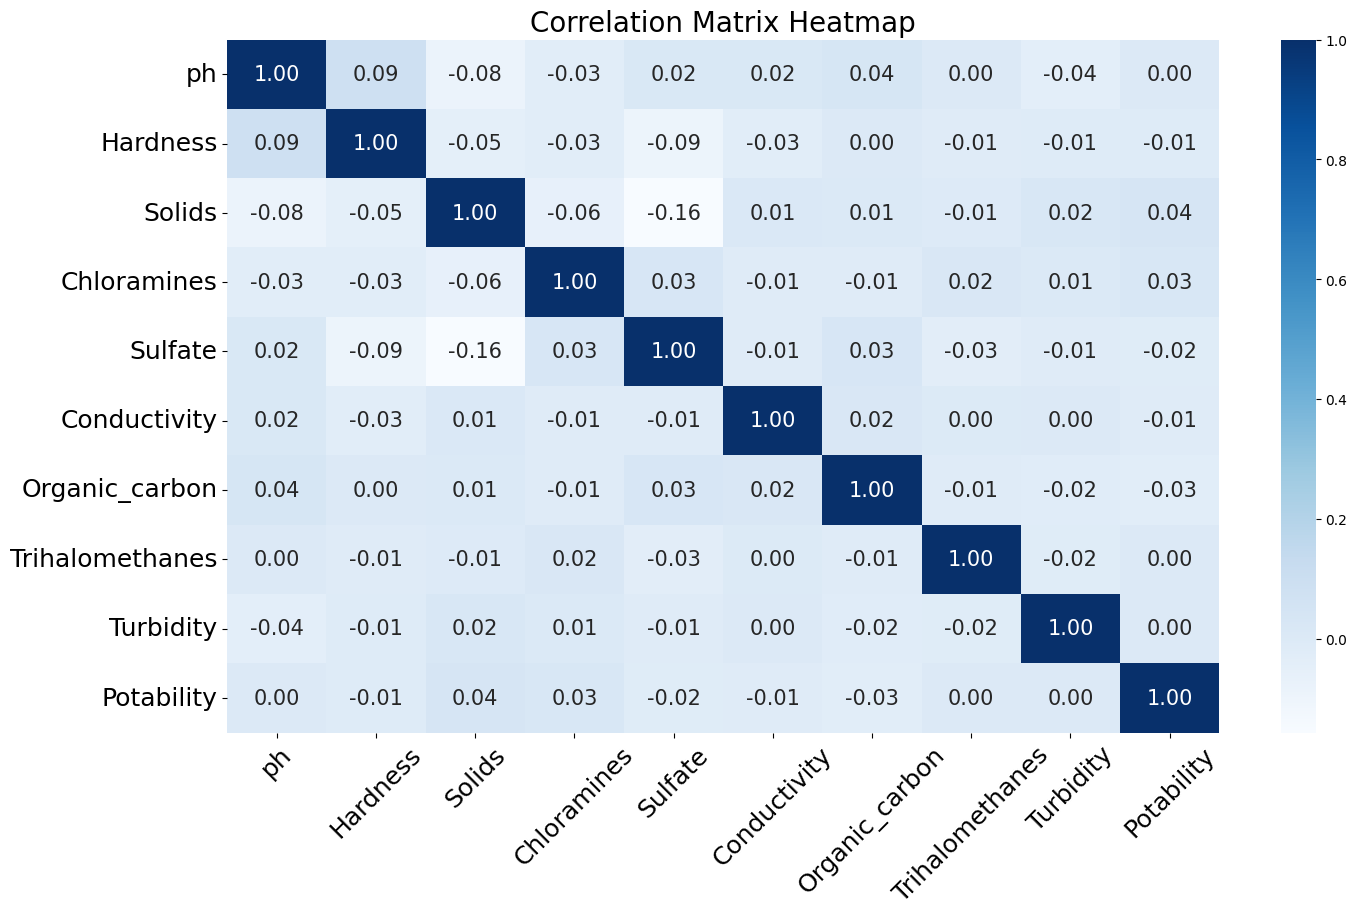

In [26]:

plt.figure(figsize=(16,9))
sns.heatmap(dataset.corr(), cbar=True, square= False, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Blues')
plt.title("Correlation Matrix Heatmap", fontdict={'size': 20})
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.show()

**Missing data**

In [27]:
dataset.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


**Looking at the count we can see that there are missing data in --**

*   PH
*   Sulfate
*   Trihalomethanes

**Calculating missing percentage in each feature**

In [28]:
missing_data = dataset.isnull().sum()
total = dataset.isnull().count()
percent = (missing_data/total) * 100
missing_data = pd.concat([missing_data, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ph,491,4.417454
Hardness,0,0.000000
Solids,0,0.000000
Chloramines,0,0.000000
Sulfate,781,7.026541
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Trihalomethanes,162,1.457490
Turbidity,0,0.000000
Potability,0,0.000000


In [29]:
# List NaN Columns
nan_columns = dataset.columns[dataset.isna().any()]
nan_columns

Index(['ph', 'Sulfate', 'Trihalomethanes'], dtype='object')

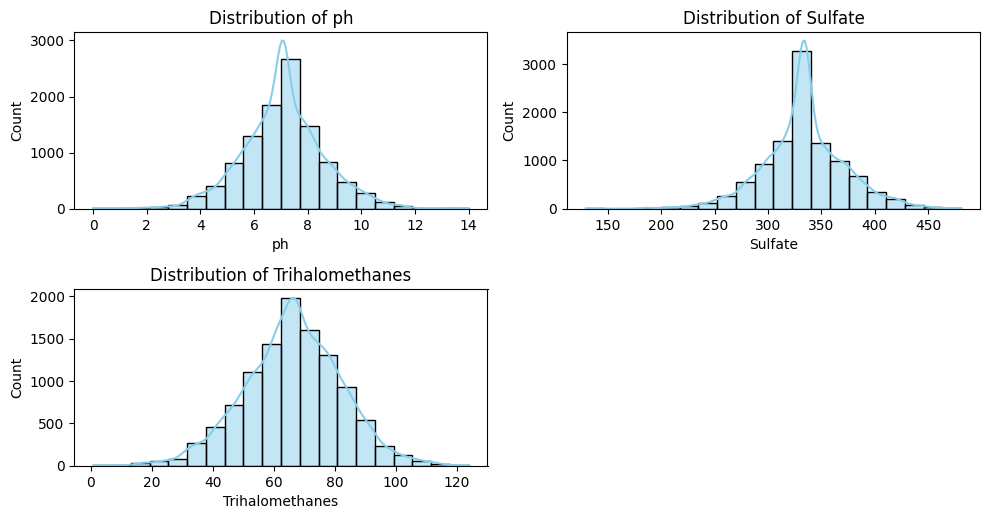

In [30]:
# Check distribution of each NaN feature

plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Loop through each column in the dataset
o = 1
for i, col in enumerate(nan_columns):
    plt.subplot(4, 2, o)
    sns.histplot(data=dataset, x=col, kde=True, color='skyblue', edgecolor='black', bins=20)
    plt.title(f'Distribution of {col}')
    o += 1

# Display the plots
plt.tight_layout()
plt.show()

**Fill NAN with simpleimputer mean**

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11115 entries, 0 to 11114
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               10624 non-null  float64
 1   Hardness         11115 non-null  float64
 2   Solids           11115 non-null  float64
 3   Chloramines      11115 non-null  float64
 4   Sulfate          10334 non-null  float64
 5   Conductivity     11115 non-null  float64
 6   Organic_carbon   11115 non-null  float64
 7   Trihalomethanes  10953 non-null  float64
 8   Turbidity        11115 non-null  float64
 9   Potability       11115 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 868.5 KB


In [33]:
df_imputed = dataset.copy()  # Create a copy to avoid modifying the original

# Impute NaN values with the mean of each column
df_imputed.fillna(df_imputed.mean(), inplace=True)

# Return the imputed DataFrame
df_imputed
df_imputed.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


In [34]:
df_imputed.to_csv('df_imputed.csv', index=False)

In [35]:
df_imputed.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


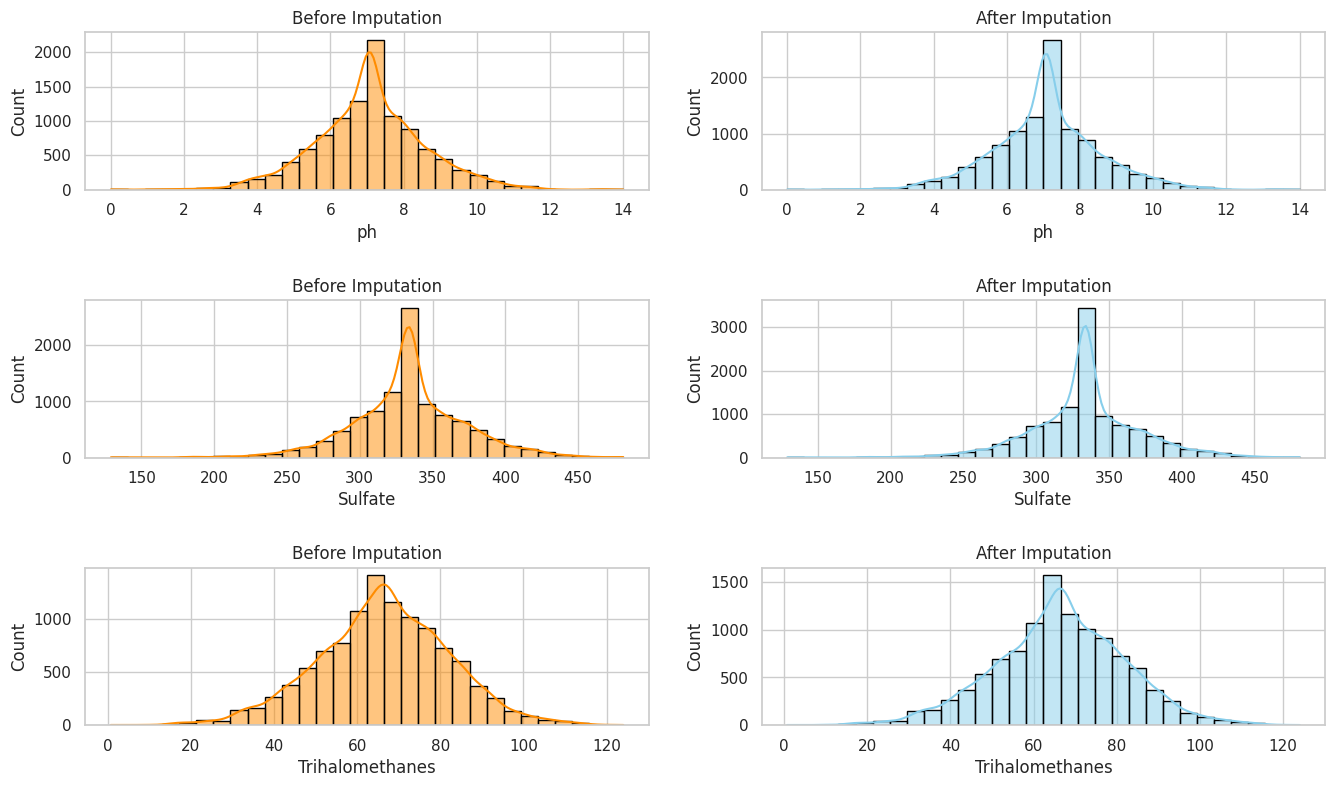

In [36]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (16, 9)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2)

# Plot the results
for feature, fig_pos in zip(['ph', 'Sulfate', 'Trihalomethanes'], [0, 1, 2]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=dataset[feature],
                     kde=True, bins=30, color="darkorange", edgecolor="black")
    axes[fig_pos, 0].set_title('Before Imputation')

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_imputed[feature],
                     kde=True, bins=30, color="skyblue", edgecolor="black")
    axes[fig_pos, 1].set_title('After Imputation')

plt.subplots_adjust(hspace=0.7)
plt.show()

**Correlation matric after imputation**

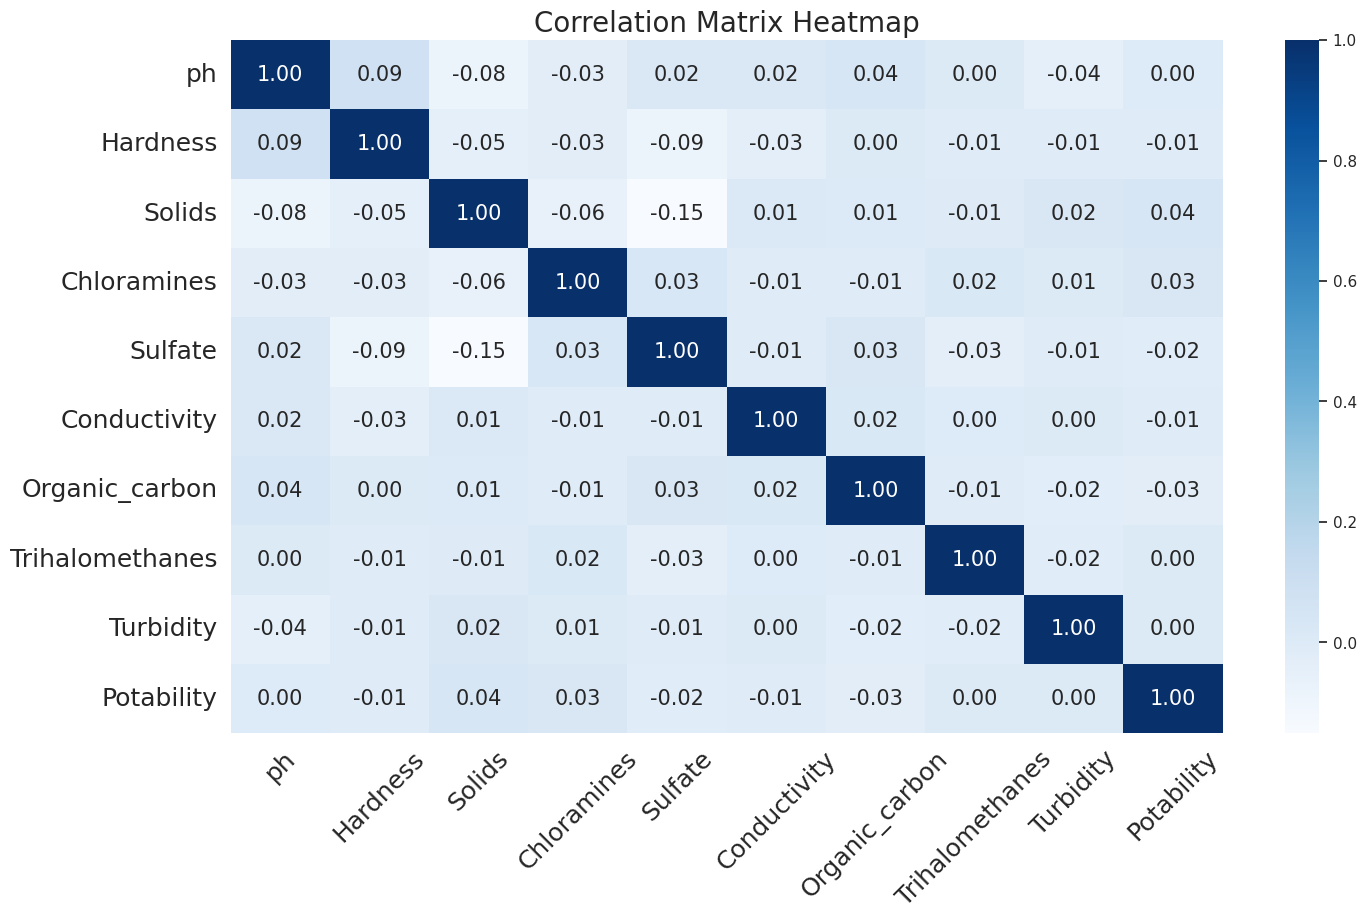

In [37]:
plt.figure(figsize=(16,9))
sns.heatmap(df_imputed.corr(), cbar=True, square= False, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Blues')
plt.title("Correlation Matrix Heatmap", fontdict={'size': 20})
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.show()

In [38]:
# Renaming the dataset for clarity
dataset_cleaned = df_imputed.copy()  # Creating a copy with the new name for better clarity

# Displaying confirmation
dataset_cleaned.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


In [39]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Example: Detecting outliers in 'pH' column
outliers = detect_outliers_iqr(dataset_cleaned, 'Solids')
print(f"Number of outliers in solids: {len(outliers)}")

Number of outliers in solids: 151


In [40]:


# Define a function to detect and replace outliers in all numeric features
def replace_outliers_all_features(data):
    # Create a copy of the dataset to avoid modifying the original
    new_data = data.copy()

    # Iterate over all numeric columns
    for column in new_data.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1, Q3, and IQR
        Q1 = new_data[column].quantile(0.25)
        Q3 = new_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate the midpoint of Q1 and Q3
        midpoint = (Q1 + Q3) / 2

        # Replace outliers with the midpoint
        new_data[column] = new_data[column].apply(
            lambda x: midpoint if x < lower_bound or x > upper_bound else x
        )

        # Recalculate outliers to verify
        remaining_outliers = new_data[(new_data[column] < lower_bound) | (new_data[column] > upper_bound)]
        print(f"Remaining outliers in '{column}': {len(remaining_outliers)}")

    return new_data

# Apply the function to the dataset
new_dataset = replace_outliers_all_features(dataset_cleaned)

# Check the new dataset
print(f"Original dataset:\n{dataset_cleaned.head()}")
print(f"New dataset with outliers replaced:\n{new_dataset.head()}")


Remaining outliers in 'ph': 0
Remaining outliers in 'Hardness': 0
Remaining outliers in 'Solids': 0
Remaining outliers in 'Chloramines': 0
Remaining outliers in 'Sulfate': 0
Remaining outliers in 'Conductivity': 0
Remaining outliers in 'Organic_carbon': 0
Remaining outliers in 'Trihalomethanes': 0
Remaining outliers in 'Turbidity': 0
Remaining outliers in 'Potability': 0
Original dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  219.674262  22210.613083     5.875041  333.775777    398.517703   
1  6.783888  193.653581  13677.106441     5.171454  323.728663    477.854687   
2  6.010618  184.558582  15940.573271     8.165222  421.486089    314.529813   
3  8.097454  218.992436  18112.284447     6.196947  333.775777    376.569803   
4  8.072612  210.269780  16843.363927     8.793459  359.516169    559.167574   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       11.502316       112.412210   2.994259           0  
1      

In [41]:
dataset_cleaned.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,11115.000000,11115.000000,11115.000000,11115.000000,11115.000000,11115.000000,11115.000000,11115.000000,11115.000000,11115.000000
mean,7.080285,196.462592,22021.089569,7.125311,333.905433,426.408250,14.257056,66.374767,3.967343,0.389294
std,1.484347,32.626769,8695.997976,1.579552,36.748419,80.559336,3.336236,15.786236,0.778751,0.487612
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.265637,176.866483,15765.786718,6.132339,316.525209,365.491679,12.033693,56.477117,3.439623,0.000000
50%,7.080795,197.222066,21021.418259,7.129520,333.775777,422.039495,14.184036,66.396293,3.958609,0.000000
75%,7.885679,216.551887,27331.361962,8.109346,351.340511,482.294404,16.541900,76.767797,4.502138,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030643,753.342620,28.300000,124.000000,6.739000,1.000000


In [42]:
import pandas as pd

# Calculate Q1, Q3, and IQR for each column
Q1 = dataset_cleaned.quantile(0.25)
Q3 = dataset_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
outliers = ((dataset_cleaned < (Q1 - 1.5 * IQR)) | (dataset_cleaned > (Q3 + 1.5 * IQR)))

# Print count of outliers per column
outlier_counts = outliers.sum()
print("Outliers per column:\n", outlier_counts)

# View rows with outliers
outlier_rows = dataset_cleaned[outliers.any(axis=1)]
print("Rows with outliers:\n", outlier_rows)


Outliers per column:
 ph                 446
Hardness           263
Solids             151
Chloramines        217
Sulfate            856
Conductivity        29
Organic_carbon      90
Trihalomethanes    177
Turbidity           66
Potability           0
dtype: int64
Rows with outliers:
               ph    Hardness        Solids  Chloramines     Sulfate  \
0       7.080795  219.674262  22210.613083     5.875041  333.775777   
2       6.010618  184.558582  15940.573271     8.165222  421.486089   
6       8.923981  135.938467  27919.770666    12.363285  333.775777   
21     10.316400  217.266842  10676.508475     3.445515  397.754946   
23      6.443754  196.615992  25740.412591     2.484380  435.672765   
...          ...         ...           ...          ...         ...   
11089   5.836105  277.065713  17711.487774     3.458192  400.167599   
11091  10.667364  173.381945  28912.202201     7.071294  276.634391   
11093  10.808157  198.596751  29614.348790     5.782418  304.622061   
1110

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Assuming dataset_cleaned is your cleaned dataset

# Define the feature columns (X) and target column (y)
X = dataset_cleaned.drop(columns=['Potability'])  # Features
y = dataset_cleaned['Potability']  # Target variable

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Keeping the class weight balanaced**

In [45]:

# Dictionary of models with tuned hyperparameters
models = {
   "Random Forest": RandomForestClassifier(random_state=42,class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5,class_weight='balanced'),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000,class_weight='balanced'),
    "SVM": SVC(kernel='rbf', random_state=42,probability=True,class_weight='balanced'),  # SVM with RBF kernel
    "KNN": KNeighborsClassifier(n_neighbors=5,weights='distance')
}




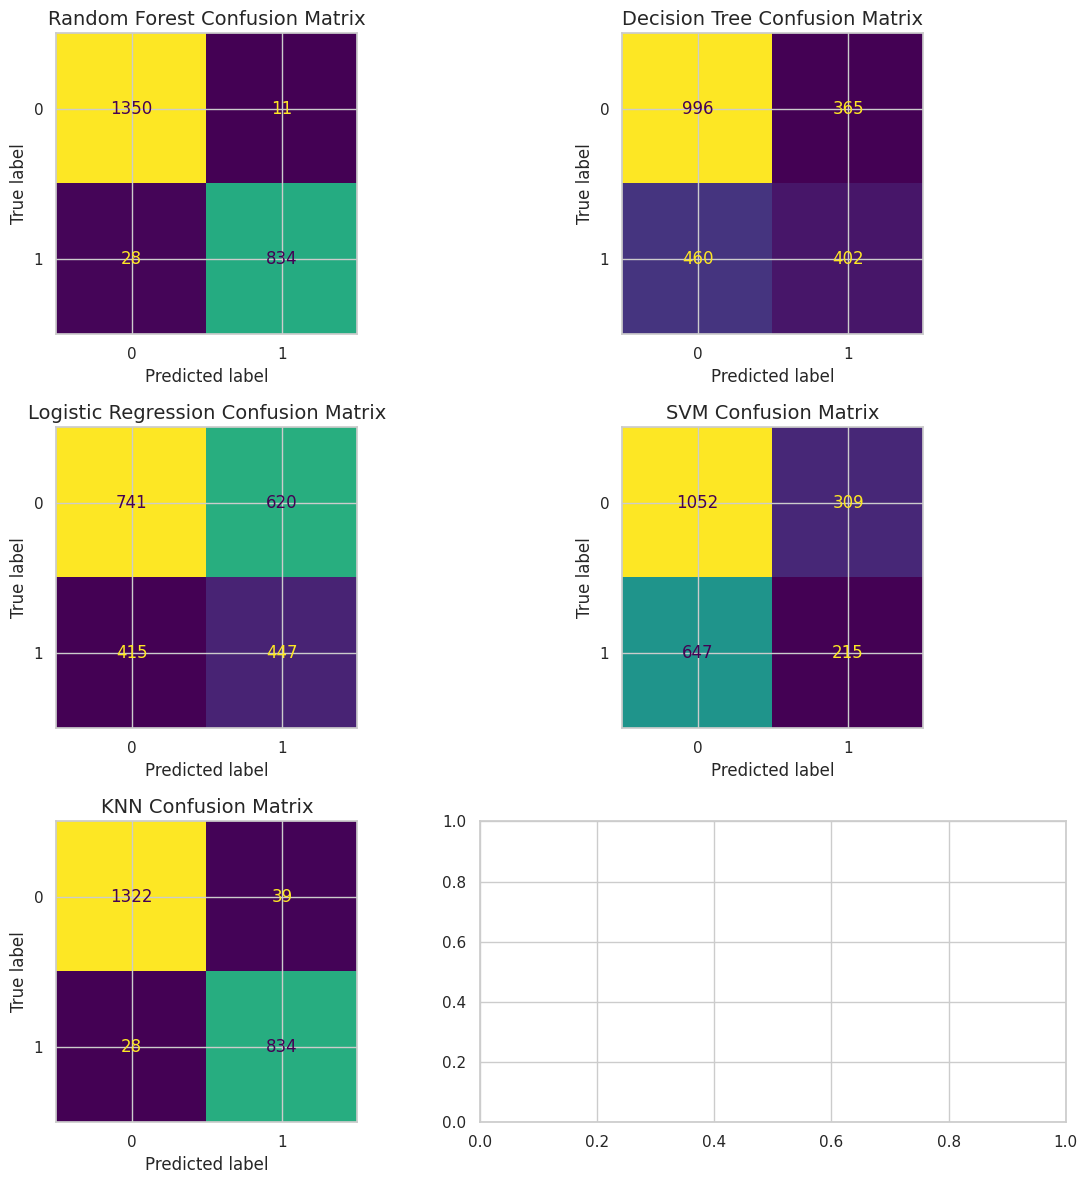

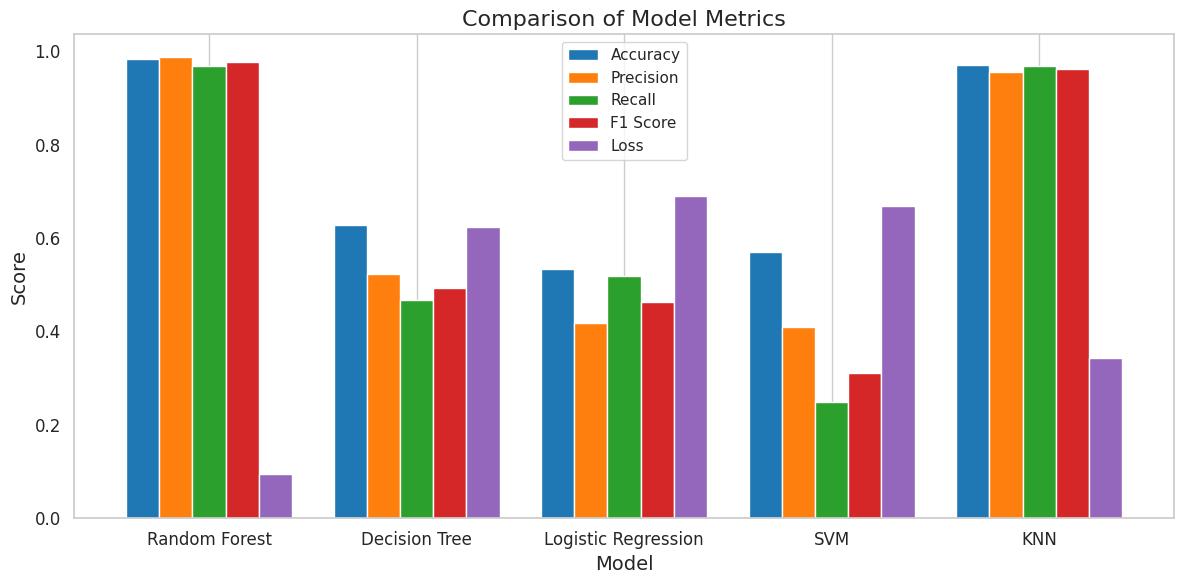

                 Model  Accuracy  Precision    Recall  F1 Score      Loss
0        Random Forest  0.982456   0.986982  0.967517  0.977153  0.094147
1        Decision Tree  0.628880   0.524120  0.466357  0.493554  0.624586
2  Logistic Regression  0.534413   0.418932  0.518561  0.463453  0.690246
3                  SVM  0.569951   0.410305  0.249420  0.310245  0.668275
4                  KNN  0.969861   0.955326  0.967517  0.961383  0.342444


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss


metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": [], "Loss": []}
confusion_matrices = {}

# Assuming models, X_train, y_train, X_test, y_test are defined

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Accuracy, Precision, Recall, F1 Score
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Cross-Entropy Loss (log loss)
    loss = log_loss(y_test, y_proba) if y_proba is not None else None

    metrics["Model"].append(name)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)
    metrics["Loss"].append(loss)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot confusion matrices
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    ConfusionMatrixDisplay(cm, display_labels=np.unique(y)).plot(ax=axes[i], colorbar=False)
    axes[i].set_title(f"{name} Confusion Matrix", fontsize=14)  # Set title font size

plt.tight_layout()
plt.show()

# Bar graph comparing metrics with adjustments
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # A color palette with good contrast

ax = metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 6), width=0.8, color=colors)

# Adjusting font sizes for labels and title
ax.set_title("Comparison of Model Metrics", fontsize=16)
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Model", fontsize=14)

# Increase font size of tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Display metrics
print(metrics_df)

**In New Dataset**

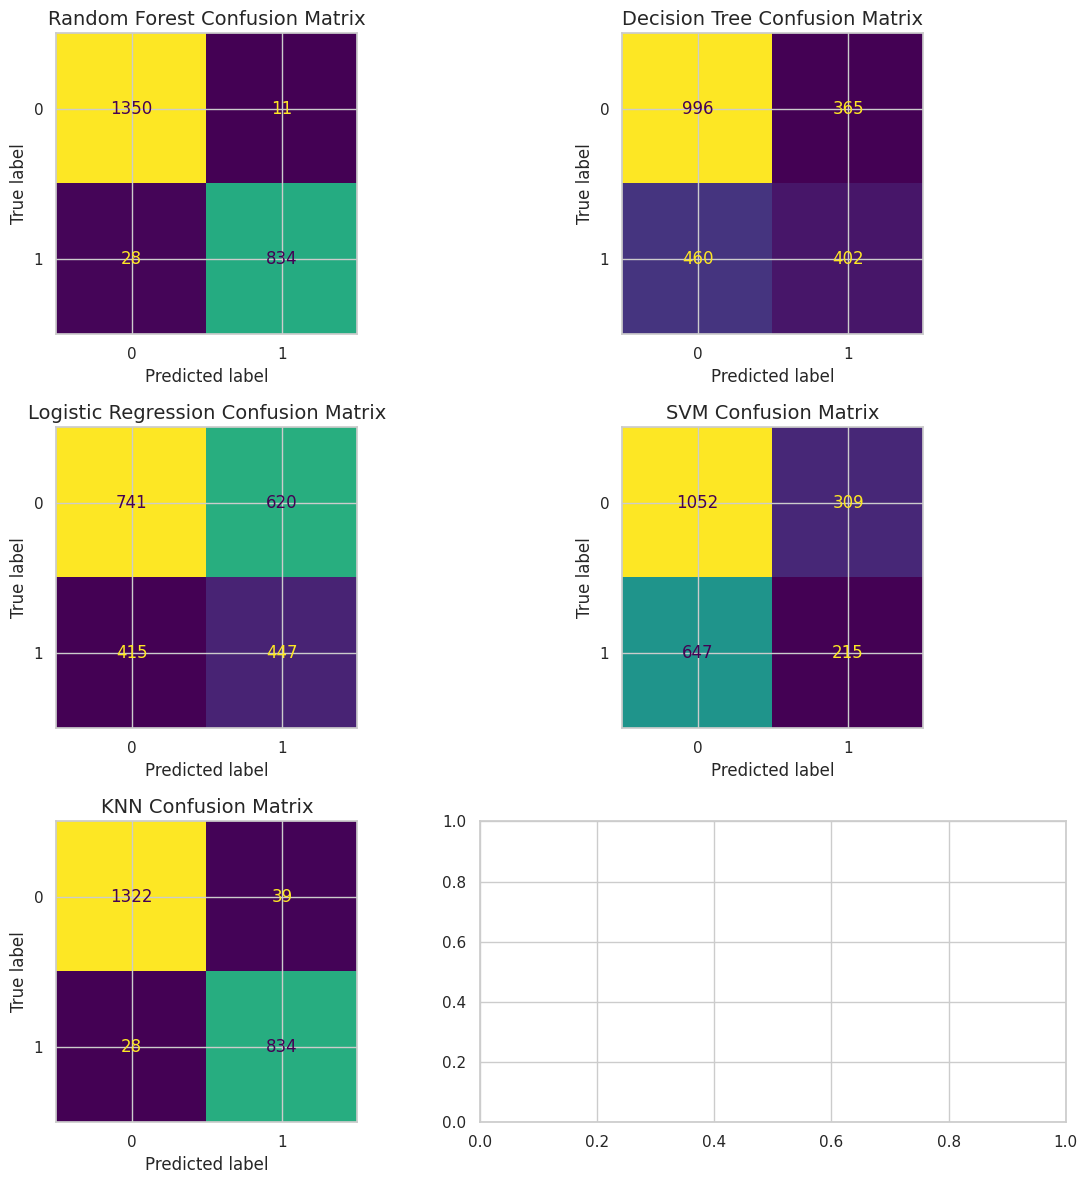

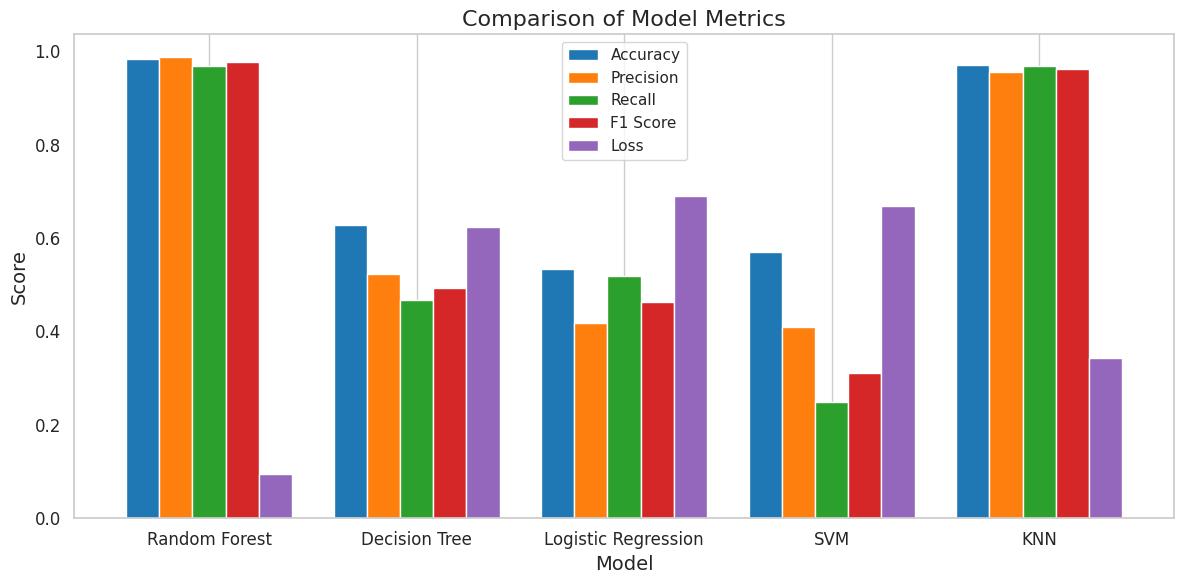

                 Model  Accuracy  Precision    Recall  F1 Score      Loss
0        Random Forest  0.982456   0.986982  0.967517  0.977153  0.094147
1        Decision Tree  0.628880   0.524120  0.466357  0.493554  0.624586
2  Logistic Regression  0.534413   0.418932  0.518561  0.463453  0.690246
3                  SVM  0.569951   0.410305  0.249420  0.310245  0.668275
4                  KNN  0.969861   0.955326  0.967517  0.961383  0.342444


In [47]:
# Define the feature columns (X) and target column (y)
X = new_dataset.drop(columns=['Potability'])  # Features
y = new_dataset['Potability']  # Target variable
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss


metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": [], "Loss": []}
confusion_matrices = {}

# Assuming models, X_train, y_train, X_test, y_test are defined

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Accuracy, Precision, Recall, F1 Score
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Cross-Entropy Loss (log loss)
    loss = log_loss(y_test, y_proba) if y_proba is not None else None

    metrics["Model"].append(name)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)
    metrics["Loss"].append(loss)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot confusion matrices
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    ConfusionMatrixDisplay(cm, display_labels=np.unique(y)).plot(ax=axes[i], colorbar=False)
    axes[i].set_title(f"{name} Confusion Matrix", fontsize=14)  # Set title font size

plt.tight_layout()
plt.show()

# Bar graph comparing metrics with adjustments
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # A color palette with good contrast

ax = metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 6), width=0.8, color=colors)

# Adjusting font sizes for labels and title
ax.set_title("Comparison of Model Metrics", fontsize=16)
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Model", fontsize=14)

# Increase font size of tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Display metrics
print(metrics_df)

With Scaling


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE  # Optional for class balancing (SMOTE)

# Assuming the dataset is loaded into `dataset_cleaned`
X = dataset_cleaned.drop(columns=['Potability'])  # Features
y = dataset_cleaned['Potability']  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Dictionary to store results
metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": [], "Loss": []}
confusion_matrices = {}

# Train models and store metrics
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Accuracy, Precision, Recall, F1 Score
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Cross-Entropy Loss (log loss)
    loss = log_loss(y_test, y_proba) if y_proba is not None else None

    metrics["Model"].append(name)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)
    metrics["Loss"].append(loss)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot confusion matrices
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    ConfusionMatrixDisplay(cm, display_labels=np.unique(y)).plot(ax=axes[i], colorbar=False)
    axes[i].set_title(f"{name} Confusion Matrix", fontsize=14)  # Set title font size

plt.tight_layout()
plt.show()

# Bar graph comparing metrics with adjustments
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # A color palette with good contrast

ax = metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 6), width=0.8, color=colors)

# Adjusting font sizes for labels and title
ax.set_title("Comparison of Model Metrics", fontsize=16)
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Model", fontsize=14)

# Increase font size of tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Display metrics
print(metrics_df)


Model Training with no Outlier in solids

In [ ]:
# Define the feature columns (X) and target column (y)
X = dataset_cleaned.drop(columns=['Potability'])  # Features
y = dataset_cleaned['Potability']  # Target variable
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss


metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": [], "Loss": []}
confusion_matrices = {}

# Assuming models, X_train, y_train, X_test, y_test are defined

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Accuracy, Precision, Recall, F1 Score
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Cross-Entropy Loss (log loss)
    loss = log_loss(y_test, y_proba) if y_proba is not None else None

    metrics["Model"].append(name)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)
    metrics["Loss"].append(loss)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot confusion matrices
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    ConfusionMatrixDisplay(cm, display_labels=np.unique(y)).plot(ax=axes[i], colorbar=False)
    axes[i].set_title(f"{name} Confusion Matrix", fontsize=14)  # Set title font size

plt.tight_layout()
plt.show()

# Bar graph comparing metrics with adjustments
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # A color palette with good contrast

ax = metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 6), width=0.8, color=colors)

# Adjusting font sizes for labels and title
ax.set_title("Comparison of Model Metrics", fontsize=16)
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Model", fontsize=14)

# Increase font size of tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Display metrics
print(metrics_df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming X (features) and y (labels) are your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)  # SVM requires `probability=True` for `predict_proba()`
}

# Hyperparameters to tune
param_grid = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10]},
    "Decision Tree": {'max_depth': [None, 10, 20, 30, 40]},
    "Random Forest": {'max_depth': [None, 10, 20, 30, 40]},
    "KNN": {'n_neighbors': [3, 5, 7, 9]},
    "SVM": {'C': [0.01, 0.1, 1, 10]}
}

# Function to evaluate each model with the selected hyperparameter
def evaluate_model(model, param, X_train, X_test, y_train, y_test):
    model.set_params(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # For models with probability predictions (like Logistic Regression, RandomForest, SVM), calculate log_loss
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Only for binary classification
        loss = log_loss(y_test, y_pred_proba)
    else:
        loss = None  # Don't compute loss for models without predict_proba

    return accuracy, precision, recall, f1, loss

# Create a dataframe to store results
results = []

# Iterate over models and tune hyperparameters
for model_name, model in models.items():
    for param_name, param_values in param_grid[model_name].items():
        for param_value in param_values:
            param = {param_name: param_value}
            accuracy, precision, recall, f1, loss = evaluate_model(model, param, X_train, X_test, y_train, y_test)

            # Store results
            results.append({
                'Model': model_name,
                'Parameter': f'{param_name}: {param_value}',
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1,
                'Loss': loss
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the comparison
print(results_df)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load your dataset
data = dataset_cleaned  # Replace with the name of your loaded dataset if needed

# Separate features and target variable
X = data.drop(columns=["Potability"])  # Drop the target column to get features
y = data["Potability"]  # Target variable

# Split the data into training (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define your models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),  # SVM requires `probability=True` for `predict_proba()`
}

# Initialize a dictionary to store FPR, TPR, and AUC for each model
roc_data = {}

# Calculate ROC curve and AUC for each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Train the model

    if hasattr(model, "predict_proba"):  # Only models with `predict_proba` can generate ROC curves
        # Get predicted probabilities for the positive class
        y_val_proba = model.predict_proba(X_val)[:, 1]

        # Calculate FPR, TPR, and thresholds
        fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)

        # Calculate AUC (Area Under the Curve)
        roc_auc = auc(fpr, tpr)

        # Store the ROC data
        roc_data[name] = {"fpr": fpr, "tpr": tpr, "auc": roc_auc}

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data["fpr"], data["tpr"], label=f"{name} (AUC = {data['auc']:.2f})", linewidth=2)

# Plot diagonal line for random chance
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", linewidth=1.5)

# Add plot details
plt.title("ROC Curves for Different Models")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np

# Define your models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)  # SVM requires `probability=True` for `predict_proba()`
}

# Split the data into training (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize lists to store the performance for plotting
train_accuracies = {model: [] for model in models}
val_accuracies = {model: [] for model in models}
train_losses = {model: [] for model in models}
val_losses = {model: [] for model in models}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    for epoch in range(1, 11):  # Example: Track performance over 10 iterations
        # Fit the model on training data
        model.fit(X_train, y_train)

        # Calculate training and validation accuracy
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

        # Store accuracy values
        train_accuracy = accuracy_score(y_train, train_pred)
        val_accuracy = accuracy_score(y_val, val_pred)

        # Calculate log loss (for models with `predict_proba`)
        if hasattr(model, "predict_proba"):
            train_loss = log_loss(y_train, model.predict_proba(X_train)[:, 1])
            val_loss = log_loss(y_val, model.predict_proba(X_val)[:, 1])
        else:
            train_loss = None
            val_loss = None

        # Store metrics for later plotting
        train_accuracies[name].append(train_accuracy)
        val_accuracies[name].append(val_accuracy)

        if train_loss is not None and val_loss is not None:
            train_losses[name].append(train_loss)
            val_losses[name].append(val_loss)

# Plot learning curves for accuracy
plt.figure(figsize=(12, 6))
for name in models.keys():
    plt.plot(range(1, 11), train_accuracies[name], label=f"{name} - Training Accuracy", linewidth=2)  # Increased line width
    plt.plot(range(1, 11), val_accuracies[name], label=f"{name} - Validation Accuracy", linewidth=2, linestyle='--')  # Different style for validation
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Learning Curves: Training vs Validation Accuracy")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines for clarity
plt.show()

# Plot learning curves for loss (if applicable)
plt.figure(figsize=(12, 6))
for name in models.keys():
    if train_losses[name] and val_losses[name]:  # Only plot for models that support `predict_proba`
        plt.plot(range(1, 11), train_losses[name], label=f"{name} - Training Loss", linewidth=2)
        plt.plot(range(1, 11), val_losses[name], label=f"{name} - Validation Loss", linewidth=2, linestyle='--')  # Dashed line for validation
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Learning Curves: Training vs Validation Loss")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, log_loss
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": [], "Loss": []}
confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Accuracy, Precision, Recall, F1 Score
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Cross-Entropy Loss (log loss)
    loss = log_loss(y_test, y_proba) if y_proba is not None else None

    metrics["Model"].append(name)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)
    metrics["Loss"].append(loss)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot confusion matrices
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    ConfusionMatrixDisplay(cm, display_labels=np.unique(y)).plot(ax=axes[i], colorbar=False)
    axes[i].set_title(f"{name} Confusion Matrix")

plt.tight_layout()
plt.show()

# Bar graph comparing metrics
metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 6))
plt.title("Comparison of Model Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Display metrics
print(metrics_df)


In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Evaluate models and plot learning curves
for name, model in models.items():
    print(f"--- {name} ---")

    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Print scores
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}" if roc_auc else "ROC AUC Score: N/A")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
    disp.plot(cmap="cividis", colorbar=False, ax=ax)
    ax.set_title(f"{name} Confusion Matrix", fontsize=16, fontweight="bold")
    ax.set_xlabel("Predicted Label", fontsize=14)
    ax.set_ylabel("True Label", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.tight_layout(pad=3.0)  # Increased padding to prevent overlap
    plt.show()

    # Bar plot of metrics
    metrics = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc if roc_auc else 0  # Handle None for bar plot
    }

    fig, ax = plt.subplots(figsize=(8, 5))
    bars = ax.bar(metrics.keys(), metrics.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
    ax.set_title(f"{name} Metrics", fontsize=16, fontweight="bold")
    ax.set_ylabel("Score", fontsize=14, labelpad=15)  # Added labelpad to create gap between label and bars
    ax.set_ylim(0, 1)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Add value labels on top of bars
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{bar.get_height():.2f}",
            ha="center", va="bottom", fontsize=12, fontweight="bold"
        )

    # Rotate x-axis labels to avoid overlap
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.tight_layout(pad=4.0)  # Increased padding to avoid overlap
    plt.show()

    # Plot learning curve
    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=3, scoring='accuracy')

    # Plot learning curves
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Error", color='blue')
    plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation Error", color='red')
    plt.xlabel("Training Size")
    plt.ylabel("Error")
    plt.title(f"Learning Curve - {name}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout(pad=3.0)
    plt.show()





In [ ]:
pip install --upgrade scikit-learn imbalanced-learn


In [ ]:
from sklearn.model_selection import learning_curve
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(kernel='rbf', random_state=42),  # SVM with RBF kernel
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Evaluate models and plot learning curves
for name, model in models.items():
    print(f"--- {name} ---")

    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Print scores
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}" if roc_auc else "ROC AUC Score: N/A")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
    disp.plot(cmap="cividis", colorbar=False, ax=ax)
    ax.set_title(f"{name} Confusion Matrix", fontsize=16, fontweight="bold")
    ax.set_xlabel("Predicted Label", fontsize=14)
    ax.set_ylabel("True Label", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.tight_layout(pad=3.0)  # Increased padding to prevent overlap
    plt.show()

    # Bar plot of metrics
    metrics = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc if roc_auc else 0  # Handle None for bar plot
    }

    fig, ax = plt.subplots(figsize=(8, 5))
    bars = ax.bar(metrics.keys(), metrics.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
    ax.set_title(f"{name} Metrics", fontsize=16, fontweight="bold")
    ax.set_ylabel("Score", fontsize=14, labelpad=15)  # Added labelpad to create gap between label and bars
    ax.set_ylim(0, 1)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Add value labels on top of bars
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{bar.get_height():.2f}",
            ha="center", va="bottom", fontsize=12, fontweight="bold"
        )

    # Rotate x-axis labels to avoid overlap
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.tight_layout(pad=4.0)  # Increased padding to avoid overlap
    plt.show()

    # Plot learning curve
    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=3, scoring='accuracy')

    # Plot learning curves
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Error", color='blue')
    plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation Error", color='red')
    plt.xlabel("Training Size")
    plt.ylabel("Error")
    plt.title(f"Learning Curve - {name}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout(pad=3.0)
    plt.show()